#        Mass shooting in America Dataset

### Introduction

In the previous assignment, this dataset was cleaned and is now being used to visualize and analyse the data that has been provided. Logistic regression will be used to predict a target. The predictor will be Shootout type (Mass shootout or non mass shootout). The author has choosen 5 predictors that could help in prdicting the outcome being the target.

In [1]:
import pandas as pd  #Data Analysis and structure library 
import csv           #Implements classes to read and write tabular data in csv format
import numpy as np   #Scientific Library
import scipy as sp   #Scientific and technical Computing library
import seaborn as sns#Data visualization library
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf # This import allows us to use R-style function (y ~ x; x predicts y)
import matplotlib.pyplot as plt #2D plotting library
plt.style.use('ggplot')#Plotting system to make plots look professional.Shows the graphs in line
%matplotlib inline  
import plotly as py  #Data analysis and graphing tool
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot #Plotly can work online or offline on jupyter notebook
init_notebook_mode(connected=True) #Initiate Plotly to plot graphs offline

In [2]:
filename = "Mass_Shooting_Dataset_clean.csv"

#Load dataset
#By opening the csv file in this format using pandas all the empty values become NaN.
df = pd.read_csv(filename, usecols= [2,7,11,12,17], header=0, index_col=None) 
#The first and the last two columns have been elimiated
df.head(10)

,Open/Close Location,Total victims,Mental Health Issues,Race,Target Victims
0,Close,46,No,White,random
1,Open,3,No,White,random
2,Close,6,No,Black,work
3,Open,585,Unknown,White,random
4,Close,5,Yes,Asian American,work
5,Close,3,Unknown,White,work
6,Close,5,Unknown,NaN,work
7,Close,3,Yes,White,work
8,Open,3,Unknown,Black,random
9,Close,11,Yes,Latino,random


In [3]:
print("Data Dimensions are: ", df.shape, '\n')

Data Dimensions are:  (323, 5) 



In [4]:
df = df.rename(columns={'Total victims': 'Total_victims', 'Target Victims': 'Target_victims'})
df

,Open/Close Location,Total_victims,Mental Health Issues,Race,Target_victims
0,Close,46,No,White,random
1,Open,3,No,White,random
2,Close,6,No,Black,work
3,Open,585,Unknown,White,random
4,Close,5,Yes,Asian American,work
5,Close,3,Unknown,White,work
6,Close,5,Unknown,NaN,work
7,Close,3,Yes,White,work
8,Open,3,Unknown,Black,random
9,Close,11,Yes,Latino,random


### Predict variable (desired Target)

Shooting Type - Was the shootout a Mass shootout or a Non Mass shootout ? (binary:"1", means "Mass Shootout" and "0" means "Non Mass Shootout".

In [5]:
#Conditionally updating a Pandas DataFrame column
df["Shooting_Type"] = np.where((df['Total_victims' ] >= 4), 1, 0) 
#0 represents NON-MASS SHOOTING
#1 represents MASS SHOOTING

## Data Exploration

In [6]:
df['Shooting_Type'].value_counts()

1    269
0     54
Name: Shooting_Type, dtype: int64

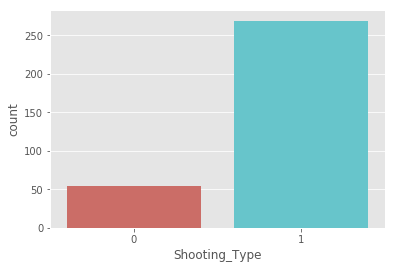

In [7]:
#Checking that your target variable is binary¶
sns.countplot(x='Shooting_Type',data=df, palette='hls')

In [8]:
non_mass_shooting = len(df[df['Shooting_Type']==0])
mass_shooting = len(df[df['Shooting_Type']==1])

pct_of_non_mass_shooting = non_mass_shooting/(non_mass_shooting+mass_shooting)
print("Percentage of Non Mass Shooting is", pct_of_non_mass_shooting*100)

pct_of_mass_shooting = mass_shooting/(non_mass_shooting+mass_shooting)
print("Percentage of Mass Shooting", pct_of_mass_shooting*100)

Percentage of Non Mass Shooting is 16.718266253869967
Percentage of Mass Shooting 83.28173374613003


The ratio of Non Mass Shooting to Mass Shooting is 17:83.

In [9]:
df.groupby('Shooting_Type').mean()

,Total_victims
Shooting_Type,
0,3.00000
1,11.72119


#### Observations
The average number of victims who were killed in a Mass shootout is much higher than the victims who were killed in a Non Mass shootout.

In [10]:
df.columns

Index(['Open/Close Location', 'Total_victims', 'Mental Health Issues', 'Race',
       'Target_victims', 'Shooting_Type'],
      dtype='object')

In [11]:
df.head(10) #Now we have the dataframe reduced down to only relevant variables

,Open/Close Location,Total_victims,Mental Health Issues,Race,Target_victims,Shooting_Type
0,Close,46,No,White,random,1
1,Open,3,No,White,random,0
2,Close,6,No,Black,work,1
3,Open,585,Unknown,White,random,1
4,Close,5,Yes,Asian American,work,1
5,Close,3,Unknown,White,work,0
6,Close,5,Unknown,NaN,work,1
7,Close,3,Yes,White,work,0
8,Open,3,Unknown,Black,random,0
9,Close,11,Yes,Latino,random,1


### Visualizations

The shooter's race, whether her or she had mental Health issues, was the shooting area opened or closed or both and the target victims are good predictors of the outcome.

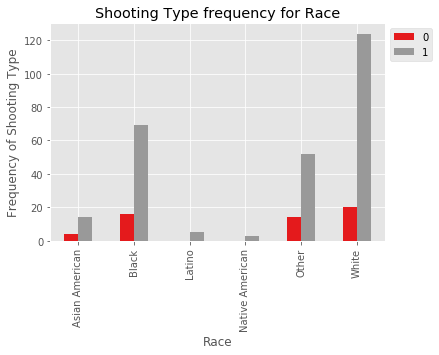

In [12]:
pd.crosstab(df.Race,df.Shooting_Type).plot(kind='bar', colormap = 'Set1')
plt.title('Shooting Type frequency for Race')
plt.xlabel('Race')
plt.ylabel('Frequency of Shooting Type')
plt.legend(bbox_to_anchor=(1.0, 1.0))
#0 is Non mass shootouts
#1 is mass Shootouts

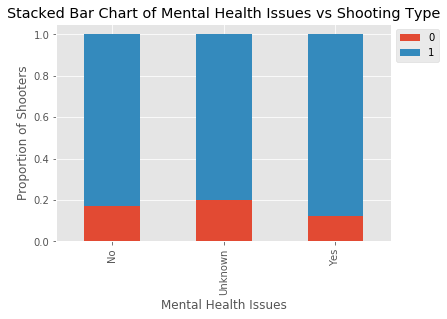

In [13]:
table=pd.crosstab(df["Mental Health Issues"],df.Shooting_Type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Mental Health Issues vs Shooting Type')
plt.xlabel('Mental Health Issues')
plt.ylabel('Proportion of Shooters')
plt.legend(bbox_to_anchor=(1.0, 1.0))

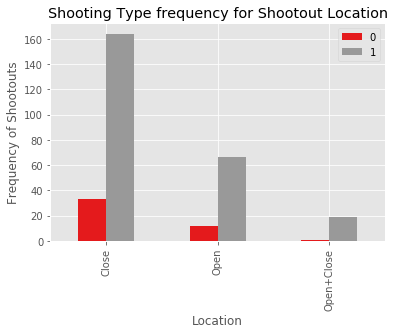

In [14]:
pd.crosstab(df['Open/Close Location'],df.Shooting_Type).plot(kind='bar', colormap = 'Set1')
plt.title('Shooting Type frequency for Shootout Location')
plt.xlabel('Location')
plt.ylabel('Frequency of Shootouts')
plt.legend(bbox_to_anchor=(1.0, 1.0))

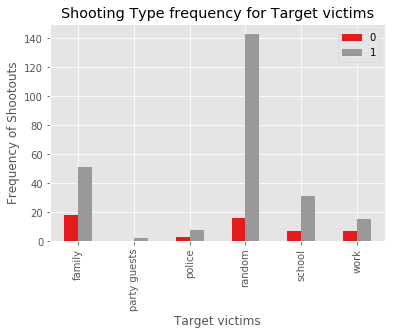

In [15]:
pd.crosstab(df['Target_victims'],df.Shooting_Type).plot(kind='bar', colormap = 'Set1')
plt.title('Shooting Type frequency for Target victims')
plt.xlabel('Target victims')
plt.ylabel('Frequency of Shootouts')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Creating dummy variables
Turning Mental Health Issues, Race, Target_victims and Open/Close location into categorical variables so that their values can be dummified. 2 ways of dummifying variables will be performed here.

In [16]:
df["Mental Health Issues"] = df["Mental Health Issues"].astype('category')
df["Mental_Health_Issues"] = df["Mental Health Issues"].cat.codes
df = df.drop(["Mental Health Issues"],1)
# 0 - for NO MENTAL ISSUES
# 1 - for NOT KNOWN IF THE SHOOTER HAD A MENTAL ILLNESS
# 2 - for THE SHOOTER HAVING A MENTAL ILLNESS

df["Open/Close Location"] = df["Open/Close Location"].astype('category')
df["Open_or_Close_Location"] = df["Open/Close Location"].cat.codes
df = df.drop(["Open/Close Location"],1)
#0 is Close Location
#1 is Open Location
#2 is Open+Close Location
df.head(10)

,Total_victims,Race,Target_victims,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
0,46,White,random,1,0,0
1,3,White,random,0,0,1
2,6,Black,work,1,0,0
3,585,White,random,1,1,1
4,5,Asian American,work,1,2,0
5,3,White,work,0,1,0
6,5,NaN,work,1,1,0
7,3,White,work,0,2,0
8,3,Black,random,0,1,1
9,11,Latino,random,1,2,0


In [17]:
df["Race"] = df["Race"].astype('category')
df["Target_victims"] = df["Target_victims"].astype('category')

replace_RT = {"Race":   {"Asian American": 1, 
                      "Native American": 2,
                      "Latino": 3,
                      "White": 4,
                      "Black": 5,
                      "Other": 6},
           
        "Target_victims": {"family": 1,
                           "school": 2,
                           "work": 3,
                           "party guests": 4,
                           "police": 5,
                           "random": 6}}

df.replace(replace_RT, inplace=True)
df.head()

,Total_victims,Race,Target_victims,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
0,46,4.0,6.0,1,0,0
1,3,4.0,6.0,0,0,1
2,6,5.0,3.0,1,0,0
3,585,4.0,6.0,1,1,1
4,5,1.0,3.0,1,2,0


#### Calculating the categorical means for the categorical variables to get more details about our data.

In [18]:
df.groupby('Race').mean()

,Total_victims,Target_victims,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
Race,,,,,
1.0,11.111111,3.875000,0.777778,0.888889,0.055556
2.0,8.333333,2.666667,1.000000,0.666667,-0.333333
3.0,9.800000,5.800000,1.000000,1.600000,0.000000
4.0,13.895833,3.810219,0.861111,1.208333,0.263889
5.0,6.541176,4.441558,0.811765,0.847059,0.341176
6.0,7.181818,4.196721,0.787879,0.924242,0.348485


### Observation
As per the data, the shooters who were White had no mental health issues and shot an average of 211 people. Most of the shootouts were mass shootouts and their target victims were random people. Average numbers of shootout were conducted by White, black and Asian Americans. The Asian Americans had mental health issues. The target victims on average were random people

In [19]:
df.groupby('Target_victims').mean()

,Total_victims,Race,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
Target_victims,,,,,
1.0,5.681159,4.391304,0.739130,1.086957,0.101449
2.0,9.210526,4.315789,0.815789,1.131579,-0.026316
3.0,5.818182,4.333333,0.681818,0.909091,0.136364
4.0,4.500000,5.000000,1.000000,1.000000,0.500000
5.0,7.727273,4.818182,0.727273,1.181818,0.636364
6.0,13.597484,4.525316,0.899371,1.056604,0.440252


In [20]:
df.groupby('Mental_Health_Issues').mean()

,Total_victims,Race,Target_victims,Shooting_Type,Open_or_Close_Location
Mental_Health_Issues,,,,,
0,6.967742,4.27957,3.928571,0.827957,0.247312
1,11.508065,4.95935,4.371681,0.798387,0.290323
2,11.698113,4.07619,3.884615,0.877358,0.292453


In [21]:
df.groupby('Open_or_Close_Location').mean()

,Total_victims,Race,Target_victims,Shooting_Type,Mental_Health_Issues
Open_or_Close_Location,,,,,
-1,6.750000,4.714286,3.192308,0.714286,1.071429
0,9.385787,4.235897,3.708791,0.832487,1.035533
1,13.923077,5.000000,5.260274,0.846154,0.974359
2,9.550000,4.400000,4.300000,0.950000,1.300000


In [22]:
df.groupby('Race').mean()

,Total_victims,Target_victims,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
Race,,,,,
1.0,11.111111,3.875000,0.777778,0.888889,0.055556
2.0,8.333333,2.666667,1.000000,0.666667,-0.333333
3.0,9.800000,5.800000,1.000000,1.600000,0.000000
4.0,13.895833,3.810219,0.861111,1.208333,0.263889
5.0,6.541176,4.441558,0.811765,0.847059,0.341176
6.0,7.181818,4.196721,0.787879,0.924242,0.348485



#http://pbpython.com/categorical-encoding.html,  https://www.datacamp.com/community/tutorials/categorical-data

In [23]:
df.dtypes

Total_victims               int64
Race                      float64
Target_victims            float64
Shooting_Type               int64
Mental_Health_Issues         int8
Open_or_Close_Location       int8
dtype: object

In [24]:
pd.DataFrame.describe(df)

,Total_victims,Race,Target_victims,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
count,323.000000,321.000000,301.000000,323.000000,323.000000,323.000000
mean,10.263158,4.473520,4.079734,0.832817,1.040248,0.278638
std,33.662309,1.193766,2.190956,0.373718,0.785104,0.706937
min,3.000000,1.000000,1.000000,0.000000,0.000000,-1.000000
25%,4.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,5.000000,4.000000,6.000000,1.000000,1.000000,0.000000
75%,9.000000,5.000000,6.000000,1.000000,2.000000,1.000000
max,585.000000,6.000000,6.000000,1.000000,2.000000,2.000000


In [25]:
df.corr()

,Total_victims,Race,Target_victims,Shooting_Type,Mental_Health_Issues,Open_or_Close_Location
Total_victims,1.000000,-0.058921,0.094241,0.096822,0.053887,0.046370
Race,-0.058921,1.000000,0.067559,-0.044927,-0.078902,0.115906
Target_victims,0.094241,0.067559,1.000000,0.178419,-0.014648,0.250822
Shooting_Type,0.096822,-0.044927,0.178419,1.000000,0.054758,0.106340
Mental_Health_Issues,0.053887,-0.078902,-0.014648,0.054758,1.000000,0.024495
Open_or_Close_Location,0.046370,0.115906,0.250822,0.106340,0.024495,1.000000


In [26]:
cols = ['Total_victims','Race','Target_victims','Mental_Health_Issues','Open_or_Close_Location','Shooting_Type']
df = df[cols]
df.head(10)

,Total_victims,Race,Target_victims,Mental_Health_Issues,Open_or_Close_Location,Shooting_Type
0,46,4.0,6.0,0,0,1
1,3,4.0,6.0,0,1,0
2,6,5.0,3.0,0,0,1
3,585,4.0,6.0,1,1,1
4,5,1.0,3.0,2,0,1
5,3,4.0,3.0,1,0,0
6,5,NaN,3.0,1,0,1
7,3,4.0,3.0,2,0,0
8,3,5.0,6.0,1,1,0
9,11,3.0,6.0,2,0,1


In [27]:
cdf = df.copy()

In [28]:
#Centering all columns except the predictor column (the last column)
for feature_name in df.columns[0:-1]:
    mean_ = df[feature_name].mean()
    sd_   = df[feature_name].std()
    cdf[feature_name] = (df[feature_name] - mean_) / (sd_)
cdf.head(10)

,Total_victims,Race,Target_victims,Mental_Health_Issues,Open_or_Close_Location,Shooting_Type
0,1.061628,-0.396661,0.876451,-1.324982,-0.394148,1
1,-0.215765,-0.396661,0.876451,-1.324982,1.020406,0
2,-0.126645,0.441024,-0.492814,-1.324982,-0.394148,1
3,17.073601,-0.396661,0.876451,-0.051264,1.020406,1
4,-0.156352,-2.909716,-0.492814,1.222453,-0.394148,1
5,-0.215765,-0.396661,-0.492814,-0.051264,-0.394148,0
6,-0.156352,NaN,-0.492814,-0.051264,-0.394148,1
7,-0.215765,-0.396661,-0.492814,1.222453,-0.394148,0
8,-0.215765,0.441024,0.876451,-0.051264,1.020406,0
9,0.021889,-1.234346,0.876451,1.222453,-0.394148,1


### Implementing the model

#### Race as a predictor

In [29]:
#Let's specify a model for Shooting_Type using only Race as a predictor:

model = smf.logit('Shooting_Type ~ Race', cdf).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.452019
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: Shooting_Type    AIC:              294.1961
Date:               2019-01-14 23:48 BIC:              301.7389
No. Observations:   321              Log-Likelihood:   -145.10 
Df Model:           1                LL-Null:          -145.43 
Df Residuals:       319              LLR p-value:      0.41372 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept     1.6034    0.1499  10.6962  0.0000   1.3096  1.8973
Race         -0.1261    0.1568  -0.8038  0.4215  -0.4335  0.1813
===============================================================

"""

In [30]:
print('\n')
print ('The Pseudo R^2 is ',model.prsquared)

#  What is the AIC and BIC of this model?
print('\n')
print ('The AIC is ',model.aic)

print('\n')
print ('The BIC is ',model.bic)

#  What is the LogLik and the LLR p-value?
print('\n')
print ('The Log-Likelihood is ',model.llf)

print('\n')
print ('The LLR p-value is ',model.llr_pvalue)

print('\033[1m'+'The coefficient for Race is ',model.params[1])



The Pseudo R^2 is  0.002296898776011802


The AIC is  294.19605495621266


The BIC is  301.7389372024727


The Log-Likelihood is  -145.09802747810633


The LLR p-value is  0.4137198902876186
The coefficient for Race is  -0.1260670293102328


#### Mental Health issues as a predictor

In [31]:
model = smf.logit('Shooting_Type ~ Mental_Health_Issues', cdf).fit()
print('\n')
print ('The Pseudo R^2 is ',model.prsquared)

#  What is the AIC and BIC of this model?
print('\n')
print ('The AIC is ',model.aic)

print('\n')
print ('The BIC is ',model.bic)

#  What is the LogLik and the LLR p-value?
print('\n')
print ('The Log-Likelihood is ',model.llf)

print('\n')
print ('The LLR p-value is ',model.llr_pvalue)

print('\033[1m'+'The coefficient for Mental Health issues is ',model.params[1])

Optimization terminated successfully.
         Current function value: 0.449892
         Iterations 6


The Pseudo R^2 is  0.003320030237793481


The AIC is  294.63028605970584


The BIC is  302.1855907061512


The Log-Likelihood is  -145.31514302985292


The LLR p-value is  0.3251506152124195
The coefficient for Mental Health issues is  0.1470311632326766


#### Target victims as a predictor

In [32]:
model = smf.logit('Shooting_Type ~ Target_victims', cdf).fit()
print('\n')
print ('The Pseudo R^2 is ',model.prsquared)

#  What is the AIC and BIC of this model?
print('\n')
print ('The AIC is ',model.aic)

print('\n')
print ('The BIC is ',model.bic)

#  What is the LogLik and the LLR p-value?
print('\n')
print ('The Log-Likelihood is ',model.llf)

print('\n')
print ('The LLR p-value is ',model.llr_pvalue)
print('\033[1m'+'The coefficient for Target victims  is ',model.params[1])

Optimization terminated successfully.
         Current function value: 0.439382
         Iterations 6


The Pseudo R^2 is  0.03430222281604434


The AIC is  268.508199963887


The BIC is  275.9224204933848


The Log-Likelihood is  -132.2540999819435


The LLR p-value is  0.0021751796758611402
The coefficient for Target victims  is  0.46748176288934684


#### Open or Close Location  as a predictor


In [33]:
model = smf.logit('Shooting_Type ~ Open_or_Close_Location', cdf).fit()
print('\n')
print ('The Pseudo R^2 is ',model.prsquared)

#  What is the AIC and BIC of this model?
print('\n')
print ('The AIC is ',model.aic)

print('\n')
print ('The BIC is ',model.bic)

#  What is the LogLik and the LLR p-value?
print('\n')
print ('The Log-Likelihood is ',model.llf)

print('\n')
print ('The LLR p-value is ',model.llr_pvalue)
print('\033[1m'+'The coefficient for Open or Close location is ',model.params[1])

Optimization terminated successfully.
         Current function value: 0.445469
         Iterations 6


The Pseudo R^2 is  0.01311922729367121


The AIC is  291.7728558615404


The BIC is  299.32816050798573


The Log-Likelihood is  -143.8864279307702


The LLR p-value is  0.05047690827815844
The coefficient for Open or Close location is  0.30715028241823444


### Fit the model with all parameters 


In [34]:
form = 'Shooting_Type ~ '
for param in cdf.columns[1:-1]:
    form += param + ' + '
form = form.rstrip(" + ")

model = smf.logit(form, cdf).fit()
print(model.summary2())
print('\033[1m',"AIC : ", model.aic, '\n', 'Pseudo R^2: ', model.prsquared)

Optimization terminated successfully.
         Current function value: 0.436854
         Iterations 6
                           Results: Logit
Model:                Logit              Pseudo R-squared:   0.044   
Dependent Variable:   Shooting_Type      AIC:                271.2385
Date:                 2019-01-14 23:48   BIC:                289.7408
No. Observations:     299                Log-Likelihood:     -130.62 
Df Model:             4                  LL-Null:            -136.58 
Df Residuals:         294                LLR p-value:        0.017957
Converged:            1.0000             Scale:              1.0000  
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------------
Intercept               1.6683   0.1656 10.0754 0.0000  1.3437 1.9928
Race            

The p-values for one variable, Target_victims is smaller than 0.05, and the remaining are bigger than 0.05, hence will be discarded.


### Conclusion

The data set used in this report gave us an insight about the shootouts that have occured in America and what  variables can be used to predict a prector. In this care we had to predict whether the shootout was a mass shootout or a non mass shootout. Target victims had a p-value of less than 0.05 and the coefficients for each of the parameters have also increased.The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable.